In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
import numpy as np

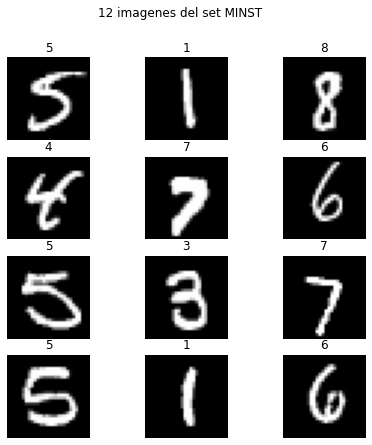

In [ ]:
imagenes=np.random.randint(0,x_train.shape[0],12)
plt.figure(figsize=(7,7))
for i in range(len(imagenes)):
 img=x_train[imagenes[i],:,:]
 plt.subplot(4,3,i+1)
 plt.imshow(img, cmap='gray')
 plt.axis('off')
 plt.title(y_train[imagenes[i]])
plt.suptitle('12 imagenes del set MINST')
plt.show()

In [ ]:
X_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]) )
X_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )


In [ ]:
print (X_train.shape)

(60000, 784)


In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
from keras.utils import  np_utils

nclasses=10
y_train=np_utils.to_categorical(y_train,nclasses)
y_test=np_utils.to_categorical(y_test,nclasses)

#ENTRENAMIENTO

In [ ]:
np.random.seed(1)
input_dim=X_train.shape[1]
output_dim=y_train.shape[1]

In [ ]:
modelo=Sequential()
modelo.add(Dense(20,input_dim=input_dim,activation='relu'))
modelo.add(Dense(output_dim,activation='sigmoid'))

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow import keras
modelo.compile(tf.keras.optimizers.SGD(0.2),loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
modeloEntrenado=modelo.fit(X_train,y_train, epochs=60,batch_size=1024,verbose=2)

Epoch 1/60
59/59 - 1s - loss: 1.0225 - accuracy: 0.7121
Epoch 2/60
59/59 - 0s - loss: 0.4432 - accuracy: 0.8804
Epoch 3/60
59/59 - 0s - loss: 0.3655 - accuracy: 0.8982
Epoch 4/60
59/59 - 0s - loss: 0.3337 - accuracy: 0.9065
Epoch 5/60
59/59 - 0s - loss: 0.3136 - accuracy: 0.9118
Epoch 6/60
59/59 - 0s - loss: 0.2987 - accuracy: 0.9149
Epoch 7/60
59/59 - 0s - loss: 0.2883 - accuracy: 0.9183
Epoch 8/60
59/59 - 0s - loss: 0.2788 - accuracy: 0.9208
Epoch 9/60
59/59 - 0s - loss: 0.2701 - accuracy: 0.9239
Epoch 10/60
59/59 - 0s - loss: 0.2627 - accuracy: 0.9254
Epoch 11/60
59/59 - 0s - loss: 0.2565 - accuracy: 0.9277
Epoch 12/60
59/59 - 0s - loss: 0.2502 - accuracy: 0.9290
Epoch 13/60
59/59 - 0s - loss: 0.2443 - accuracy: 0.9300
Epoch 14/60
59/59 - 0s - loss: 0.2393 - accuracy: 0.9323
Epoch 15/60
59/59 - 0s - loss: 0.2335 - accuracy: 0.9339
Epoch 16/60
59/59 - 0s - loss: 0.2293 - accuracy: 0.9349
Epoch 17/60
59/59 - 0s - loss: 0.2243 - accuracy: 0.9360
Epoch 18/60
59/59 - 0s - loss: 0.2202 - 

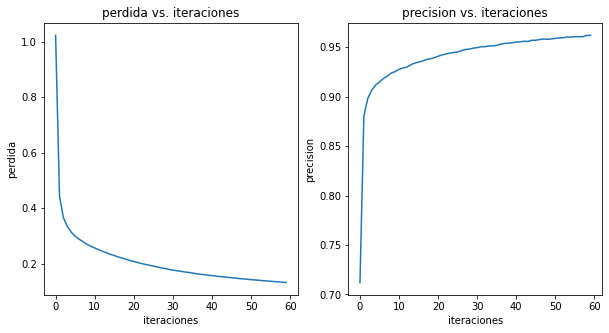

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(modeloEntrenado.history['loss'])
plt.title('perdida vs. iteraciones')
plt.ylabel('perdida')
plt.xlabel('iteraciones')

plt.subplot(1,2,2)
plt.plot(modeloEntrenado.history['accuracy'])
plt.title('precision vs. iteraciones')
plt.ylabel('precision')
plt.xlabel('iteraciones')
plt.show()


#validacion

In [ ]:
puntaje = modelo.evaluate(X_test,y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))


Precisión en el set de validación: 95.5%


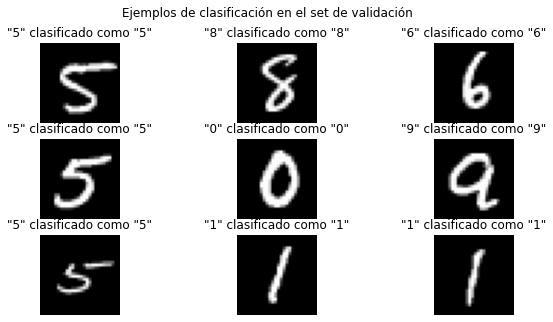

In [ ]:
Y_pred = modelo.predict(X_test)
classes_y=np.argmax(Y_pred,axis=1)

plt.figure(figsize=(10,5))
imagenes = np.random.randint(0,X_test.shape[0],9)
for i in range(len(imagenes)):
	idx = imagenes[i]
	img = X_test[idx,:].reshape(28,28)
	cat_original = np.argmax(y_test[idx,:])
	cat_prediccion = classes_y[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title('"{}" clasificado como "{}"'.format(cat_original,cat_prediccion))
plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()
